In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import statsmodels.api as sm


In [4]:
df = pd.read_csv('50_Startups.csv')

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [14]:
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#####  Lets drop STATES column

In [18]:
df = df.drop('State', axis = 1)


In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Visulaization

<AxesSubplot:>

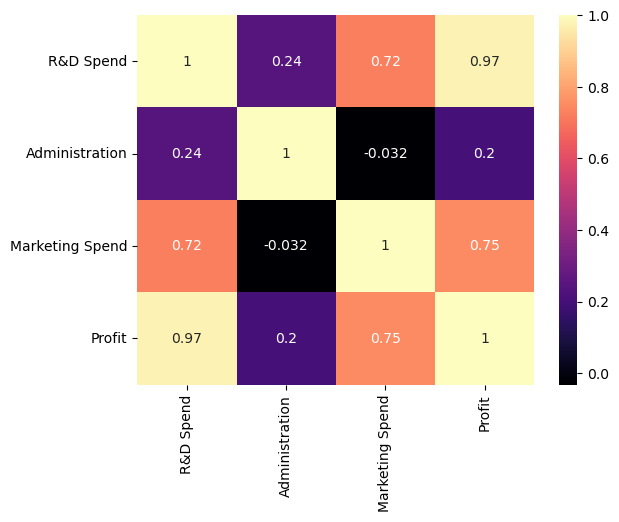

In [22]:
sns.heatmap(corr, cmap='magma', annot=True)

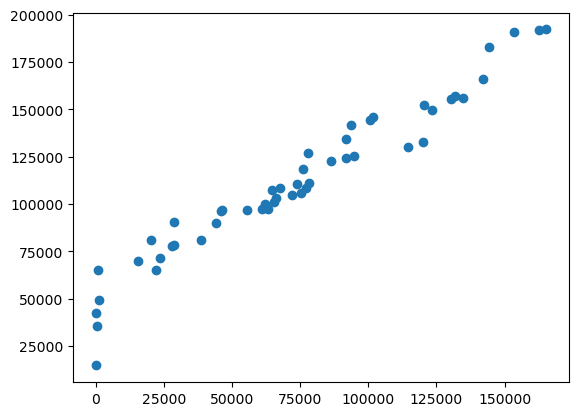

In [26]:
plt.scatter("R&D Spend","Profit", data=df)



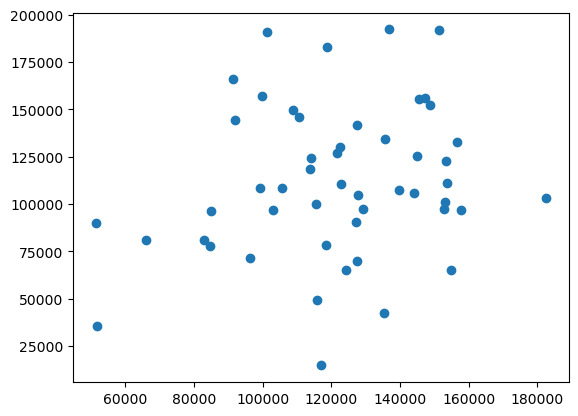

In [29]:
plt.scatter("Administration","Profit", data=df)


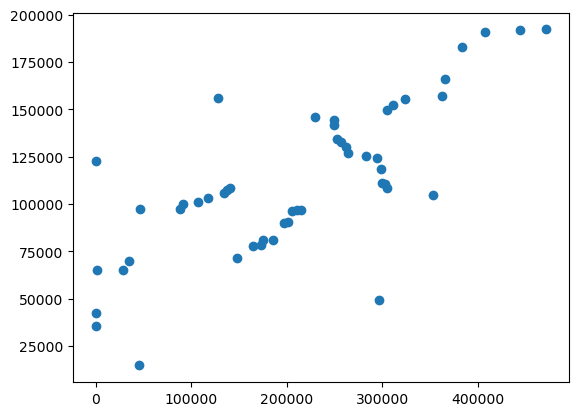

In [30]:
plt.scatter("Marketing Spend","Profit", data=df)


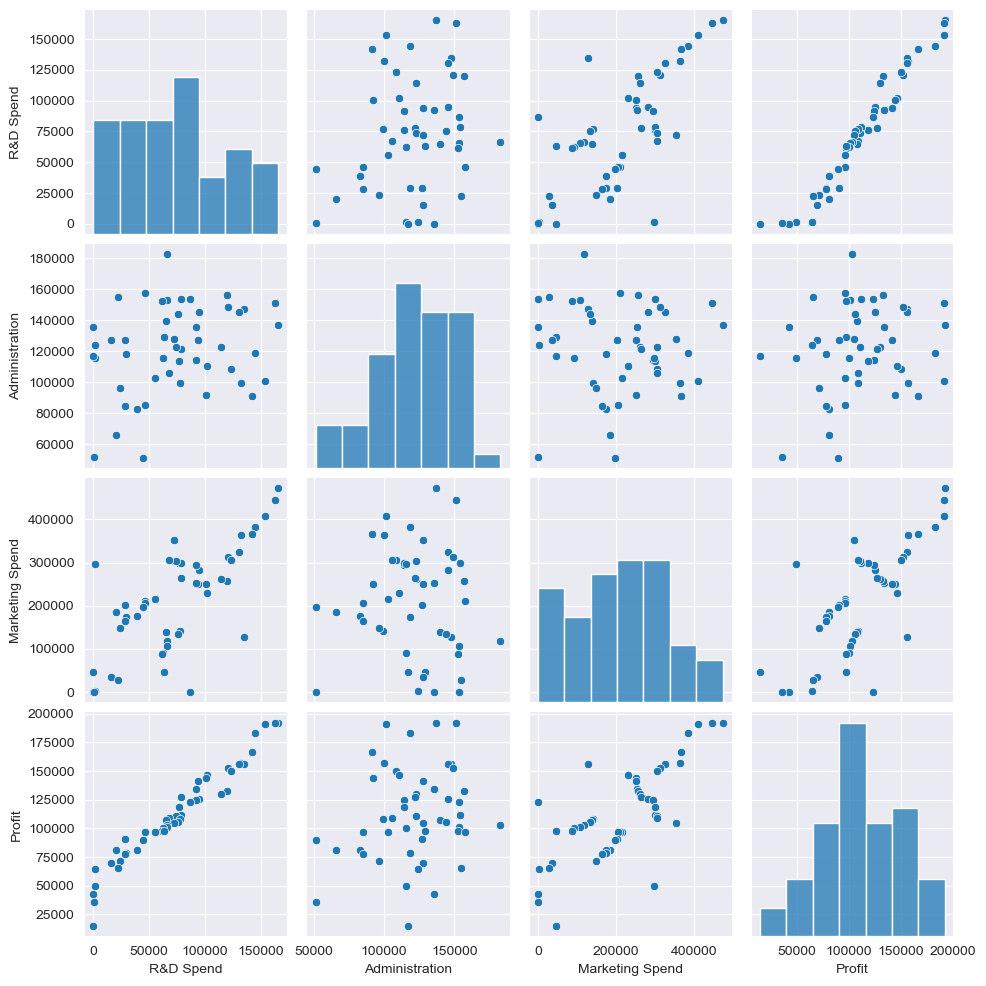

In [53]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

### Model Building 

In [69]:
X = df[['R&D Spend','Administration', 'Marketing Spend']]
Y = df[['Profit']]

In [74]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):                    1.17e-44
Time:                        19:30:23   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7180      0.065     11.047      0.000       0.587       0.849
Administration      0.3277      0.031     10.458      0.000       0.265       0.391
Marketing Spend     0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         9.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sq Root Transfomration of X

In [77]:
X_sqrt = np.sqrt(df[['R&D Spend', 'Marketing Spend', "Administration"]])

In [80]:
model2 = sm.OLS(Y, X_sqrt).fit()
predictions2 = model2.predict(X_sqrt)

In [81]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1411.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):                    5.02e-46
Time:                        19:33:20   Log-Likelihood:                         -542.47
No. Observations:                  50   AIC:                                      1091.
Df Residuals:                      47   BIC:                                      1097.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend         338.6097     24.959     13.567      0.000     288.399     388.821
Marketing Spend    23.2003     14.072      1.649      0.106      -5.109      51.509
Administration     49.0780     14.740      3.330      0.002      19.425      78.731
==============================================================================
Omnibus:                        6.476   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.008
Skew:                           0.847   Prob(JB):                       0.0496
Kurtosis:                       3.108   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square Root Transformation of Y

In [83]:
Y_sqrt = np.sqrt(df['Profit'])


In [84]:
model3 = sm.OLS(Y_sqrt, X).fit()
predictions3 = model3.predict(X)

In [85]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              696.9
Date:                Sun, 24 Sep 2023   Prob (F-statistic):                    6.05e-39
Time:                        19:34:18   Log-Likelihood:                         -266.17
No. Observations:                  50   AIC:                                      538.3
Df Residuals:                      47   BIC:                                      544.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.0009      0.000      3.528      0.001       0.000       0.001
Administration      0.0016      0.000     13.765      0.000       0.001       0.002
Marketing Spend     0.0003    8.2e-05      3.563      0.001       0.000       0.000
==============================================================================
Omnibus:                        0.635   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.750
Skew:                           0.168   Prob(JB):                        0.687
Kurtosis:                       2.503   Cond. No.                         9.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square Root Transformation of X & Y

In [86]:
model4 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions4 = model4.predict(X_sqrt)

In [87]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2396.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):                    2.20e-51
Time:                        19:34:58   Log-Likelihood:                         -235.70
No. Observations:                  50   AIC:                                      477.4
Df Residuals:                      47   BIC:                                      483.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.5012      0.054      9.277      0.000       0.393       0.610
Marketing Spend     0.0822      0.030      2.699      0.010       0.021       0.143
Administration      0.4787      0.032     15.001      0.000       0.414       0.543
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.926
Skew:                           0.322   Prob(JB):                        0.629
Kurtosis:                       3.174   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model_names = ["Model 1 - Regression", "Model 2 - Sq_Root X", "Model 3 - Sq_Root Y", "Model 4 - Sq_Root of X and Y"]
r_squared_values = [0.987, 0.989, 0.978, 0.994]

In [92]:
data = {"Model Name": model_names, "R-squared": r_squared_values}
df_t = pd.DataFrame(data)

In [93]:
df_t

,Model Name,R-squared
0,Model 1 - Regression,0.987
1,Model 2 - Sq_Root X,0.989
2,Model 3 - Sq_Root Y,0.978
3,Model 4 - Sq_Root of X and Y,0.994


### As according to the table we can select Model 4 - Sq_Root of X and Y with R_sq value of 0.994